<a href="https://colab.research.google.com/github/dennismingming/2d-wave-slits-ex/blob/main/2d_wave_slits_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
# Solving a PDE

# Equation
# wtt = c^2 wxx + c^2 wyy + f

## Dmain
# Space

Lx = 4 # Space 크기
Ly = 4
dx = 0.1 # 0.1
dy = dx
nx = int(Lx/dx)
ny = int(Ly/dy)
S = 0
AorB = [0, 0, 0, 0, 0] # A or B 어느 슬릿을 통과했는지 기록

In [5]:
# Parameters
CFL = 0.5 # CFL = c.dy/dx
c = 1
dt = round(CFL*dx/c,6);
T = 100

x = np.linspace(0, Lx, nx) # equally divide from 0 to Lx by nx
y = np.linspace(0, Ly, ny) # equally divide from 0 to Ly by ny

Testing...


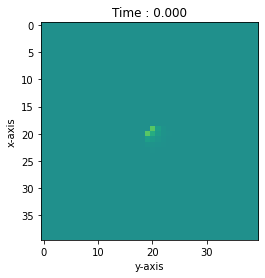

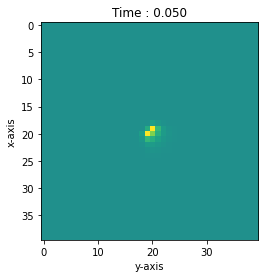

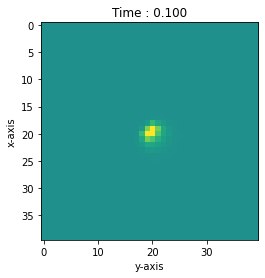

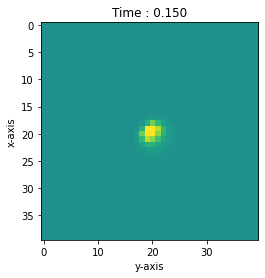

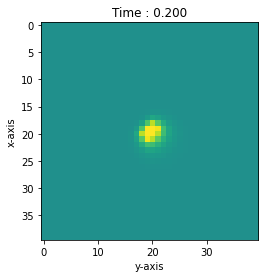

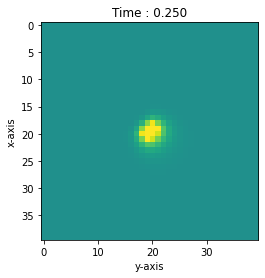

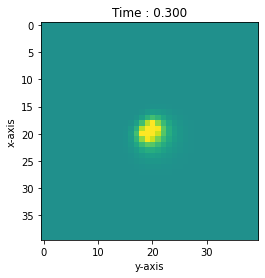

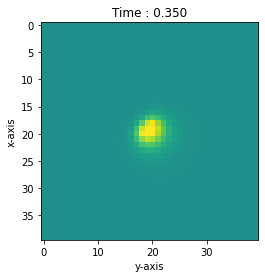

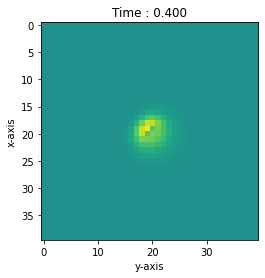

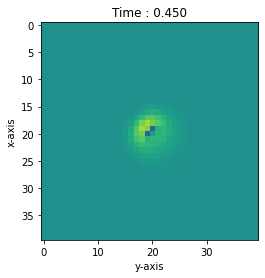

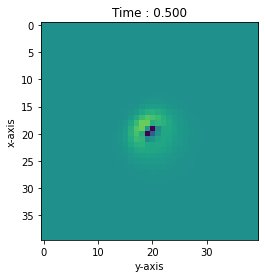

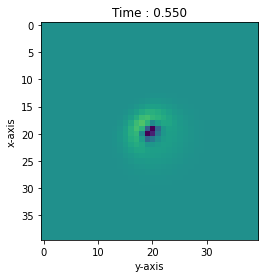

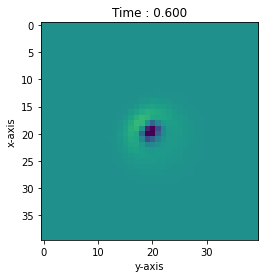

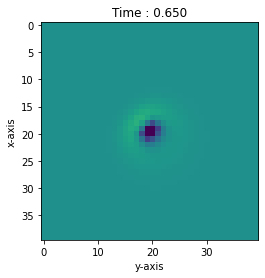

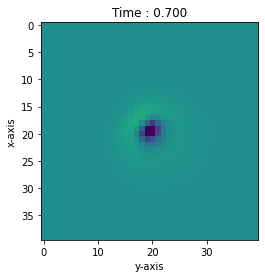

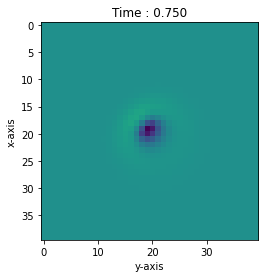

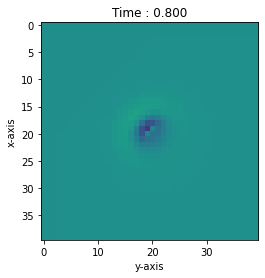

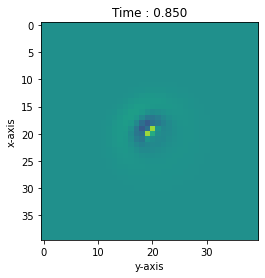

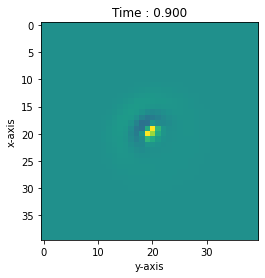

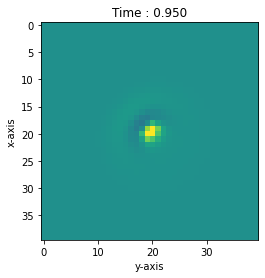

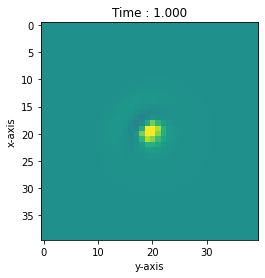

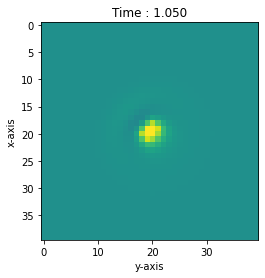

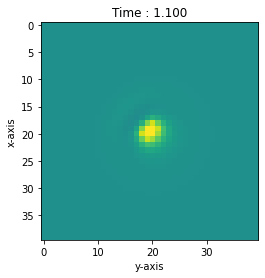

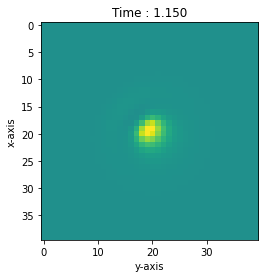

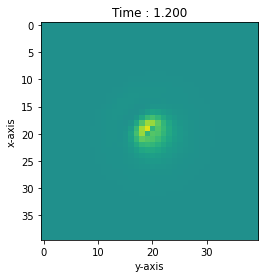

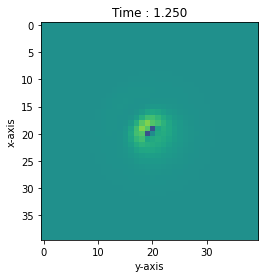

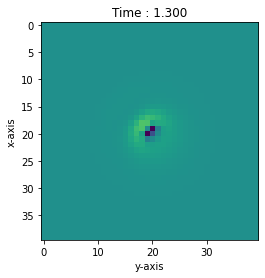

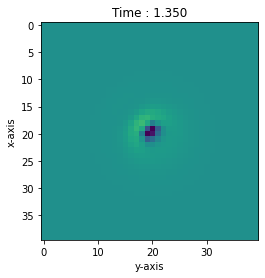

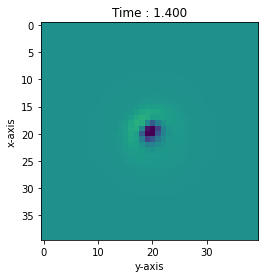

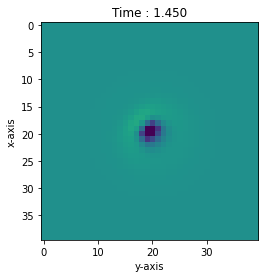

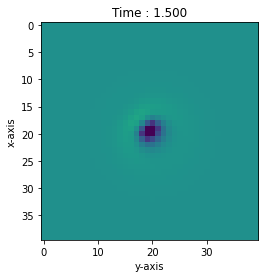

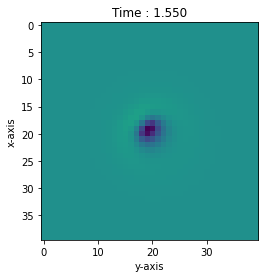

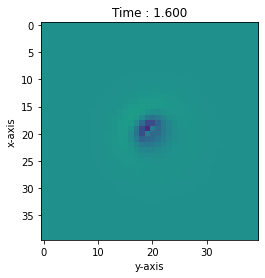

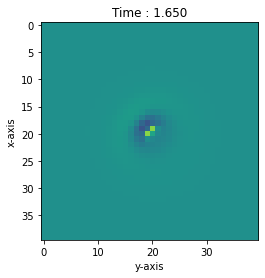

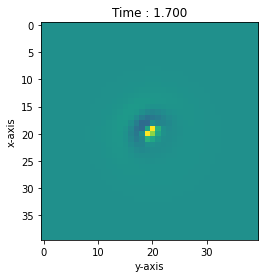

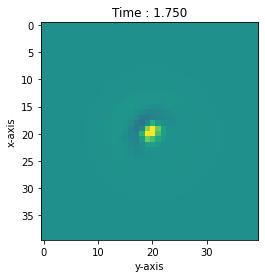

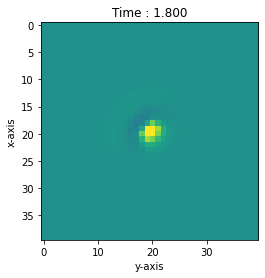

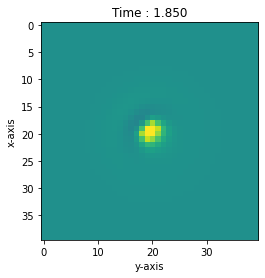

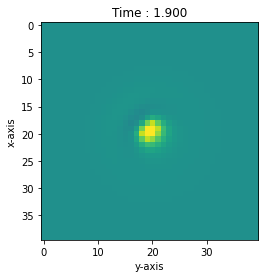

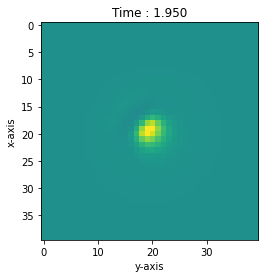

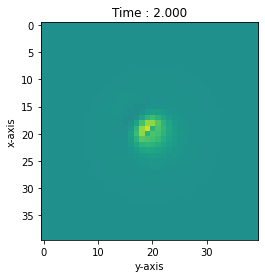

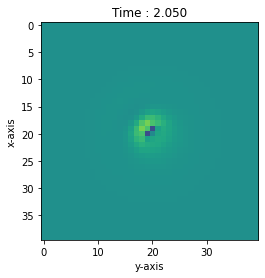

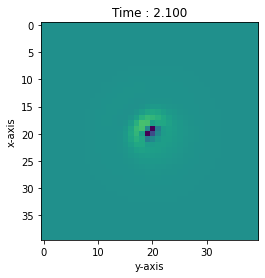

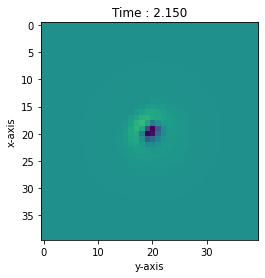

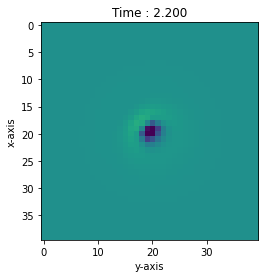

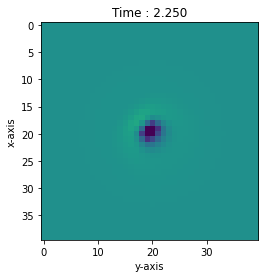

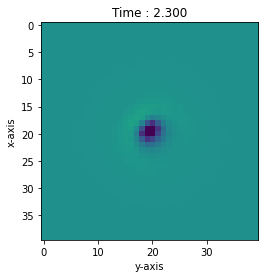

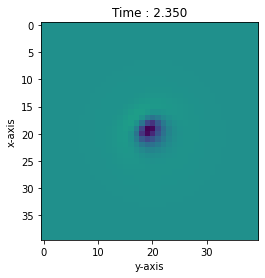

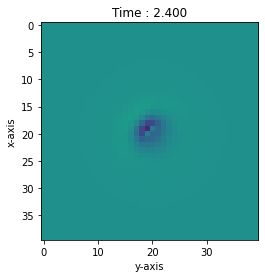

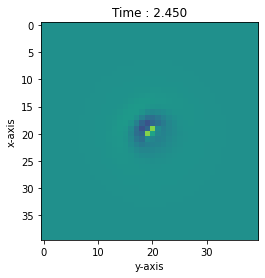

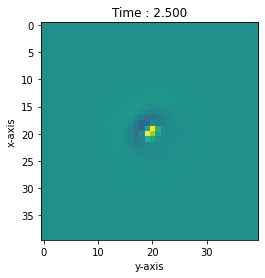

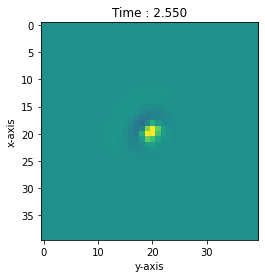

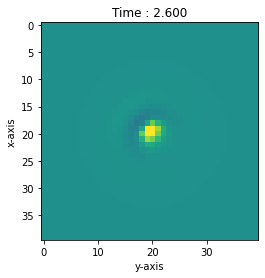

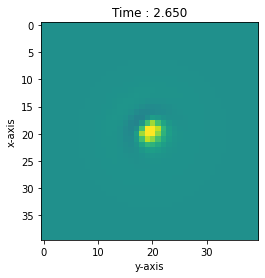

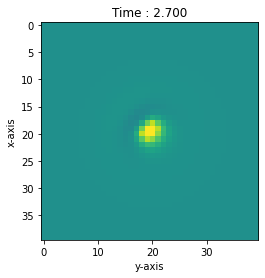

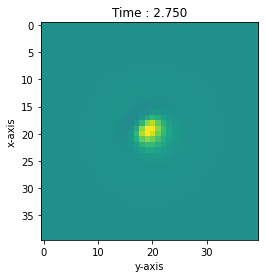

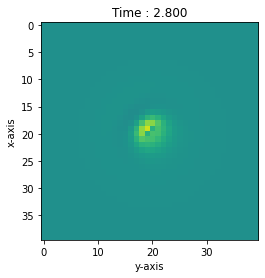

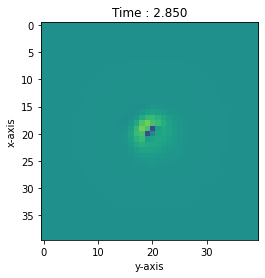

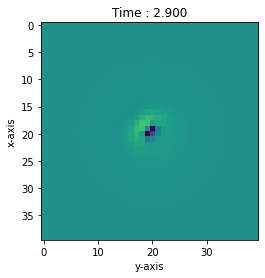

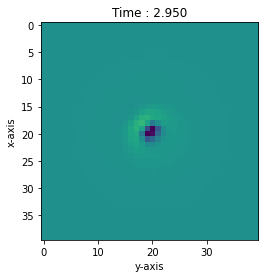

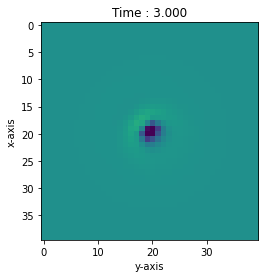

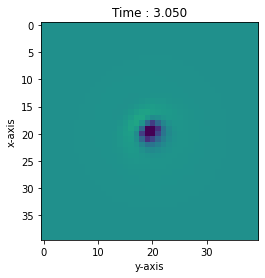

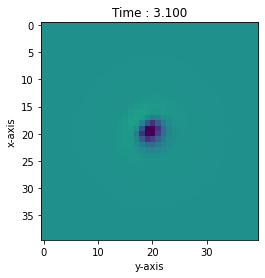

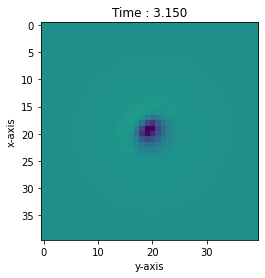

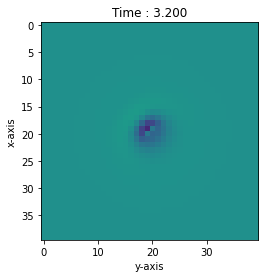

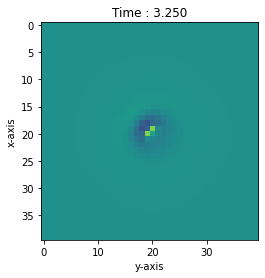

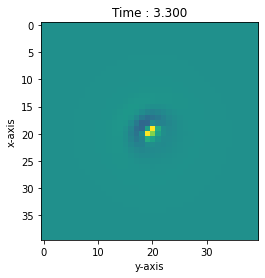

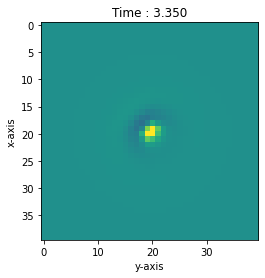

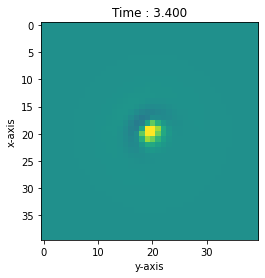

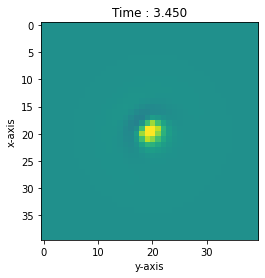

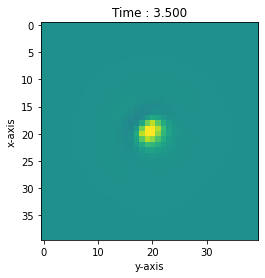

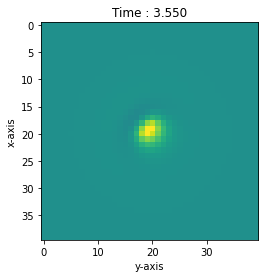

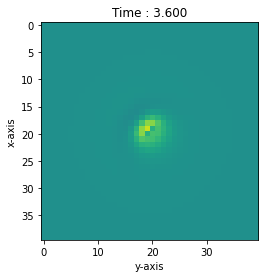

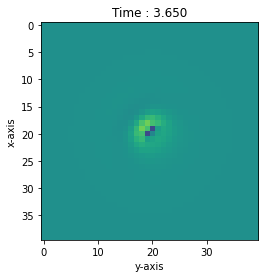

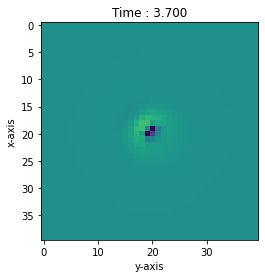

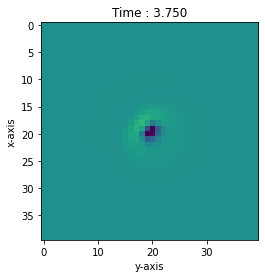

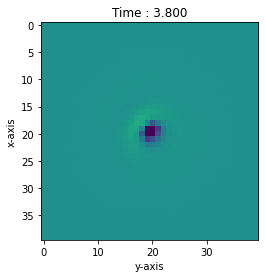

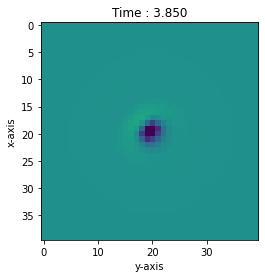

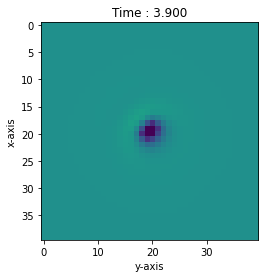

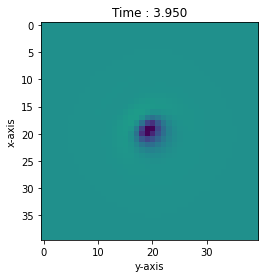

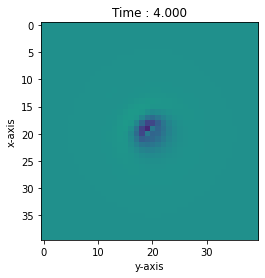

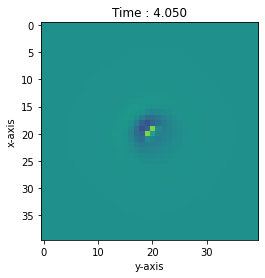

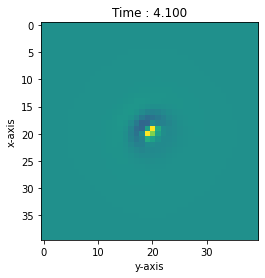

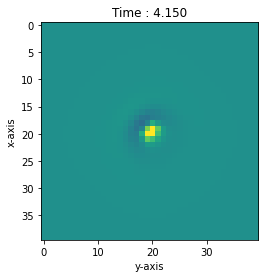

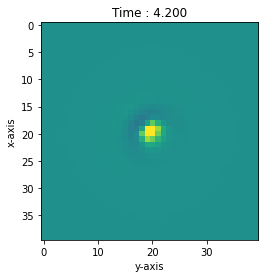

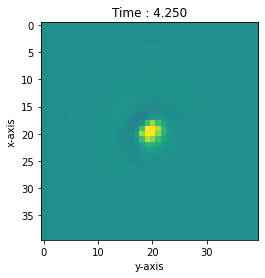

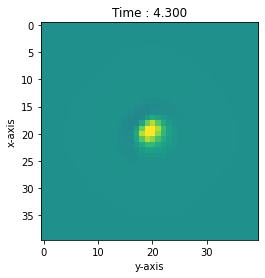

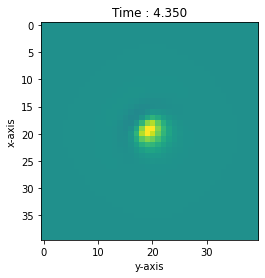

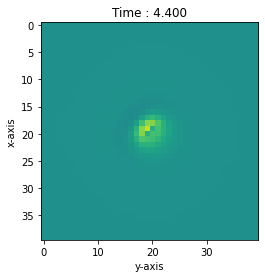

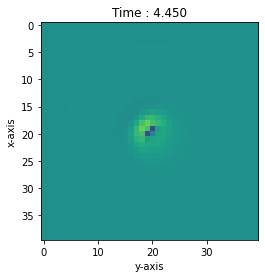

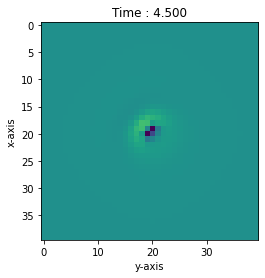

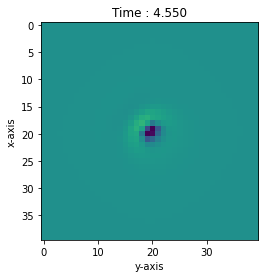

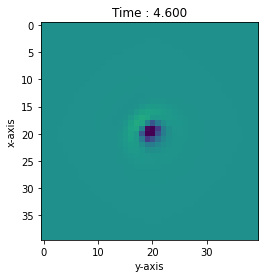

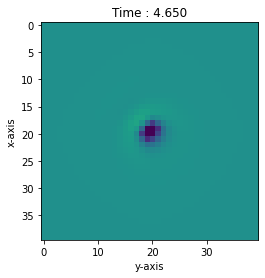

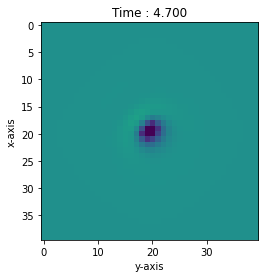

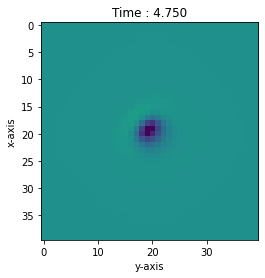

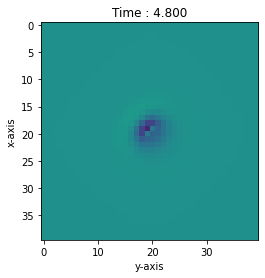

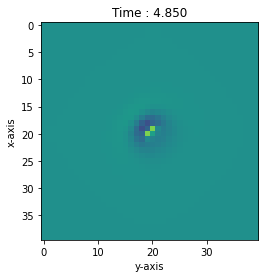

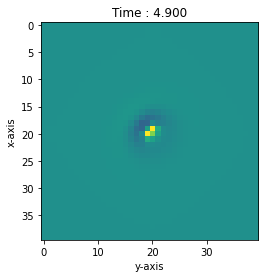

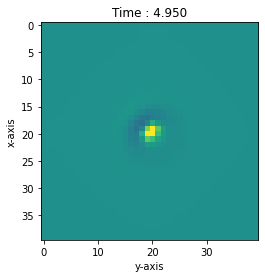

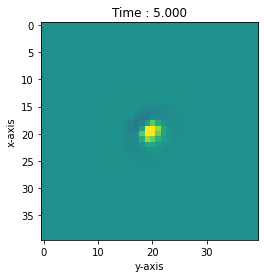

In [9]:
t = 0

wn = np.zeros((nx,ny))
wnp1 = wn
wnm1 = wn

strong = 2 # 생각해봐 세기는 단위 거리에서의 세기니깐 dx가 변하면 세기도 변해야겠지 거리의 제곱으로
picking_point = 0.1 # 측정거리
t_test = 5 # 테스트 타임
strong_test = np.zeros(int(t_test/dt))

#로딩바 구현하기
print("Testing...")

while (t < t_test):
#사인파 발생기
    wn[int(nx/2),int(ny/2)] = wn[int(nx/2),int(ny/2)] + strong * dt * dt * (2 * (1/dx)) * math.sin(50 * math.pi * (t/20)) - dt*dt*(2 * (1/dx)) * math.sin(50 * math.pi * (t - dt)/20)
    for i in range(2, nx - 1):
        for j in range(2, ny - 1):
            wnp1[i, j] = 2*wn[i, j] -  wnm1[i, j] + CFL*CFL*(wn[i+1,j]+wn[i,j+1] - 4*wn[i,j] + wn[i-1,j] + wn[i,j-1])

  # Absorbing boundary conditions
    wnp1[1,:] = wn[2,:] + ((CFL-1)/(CFL+1))*(wnp1[2,:]-wn[1,:])
    wnp1[-1,:] = wn[-2,:] + ((CFL-1)/(CFL+1))*(wnp1[-2,:] - wn[-1,:])
    wnp1[:,1]=wn[:,2] + ((CFL-1)/(CFL+1))*(wnp1[:,2]-wn[:,1])
    wnp1[:,-1]=wn[:,-2] + ((CFL-1)/(CFL+1))*(wnp1[:,-2]-wn[:,-1])



# 시간 조정
    t = t + dt
    wnm1 = wn
    wn = wnp1

# 테스트 중이라는걸 표시하기

#표시 끝

    # 그래프 그리기(이후 동영상으로 저장하기)
    plt.imshow(wn)
    plt.title(f"Time : {t - dt:.3f}")#{round(t_sub,3)}")
    plt.xlabel('y-axis')
    plt.ylabel('x-axis')
    #plt.colorbar()

    plt.clim(-0.01,0.01)
    plt.pause(0.0001)
plt.show()
